In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels as sm
from lifelines import KaplanMeierFitter
%matplotlib inline

Generate some random numbers and take a quick look at them.

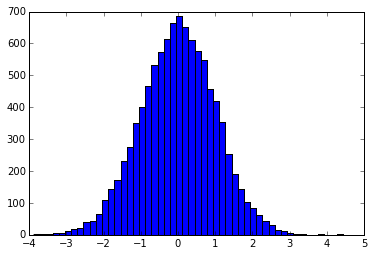

In [2]:
x = np.random.randn(10000)
_ = plt.hist(x,bins=50)

hist can actually generate an empirical CDF by using an option

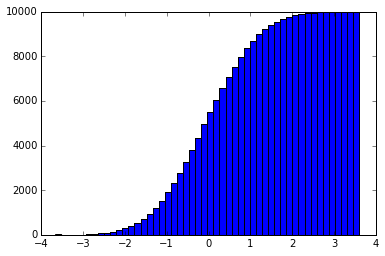

In [4]:
_ = plt.hist(x,bins=50,cumulative=True)

We can manually calculate the POE curve this way...
http://www.ehow.com/how_5365868_calculate-exceedance-probability.html

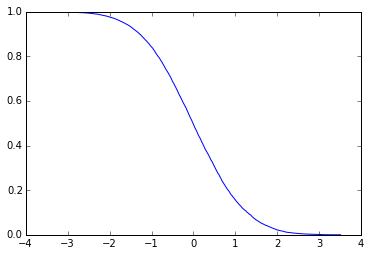

In [5]:
x = np.random.randn(10000)
x = sorted(x,reverse=True)
p =  (1. + np.arange(len(x))) / (len(x) + 1.)
plt.plot(x,p)

You can also use the percentile function, which includes better options for interpolation, should you need them (for example, if you wanted to calculated the POE at a specific, arbitrary point).  The percentile function really maps to a CDF, so you need to do 1-CDF to get the POE.  In this case, since percentiles are given 0 to 100 (instead of 0 to 1) you'll need to scale that.

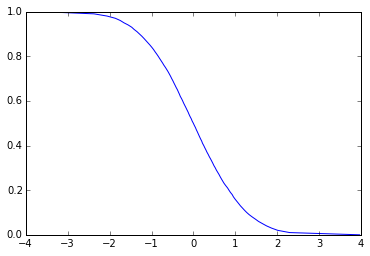

In [6]:
x = np.random.randn(10000)
prc = np.linspace(0,100,101)
p = np.percentile(x,prc)
plt.plot(p,(100-prc)/100)

The best approach is probably to use tools developed for the purpose.  The statsmodels package has such a tool available.

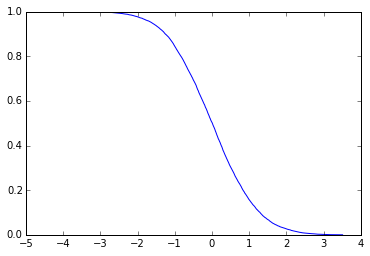

In [8]:
x = sorted(np.random.randn(10000))
ecdf = sm.tools.tools.ECDF(x)
y = 1-ecdf(x)
plt.plot(x,y)


Another useful tool for survival analysis is the lifelines package

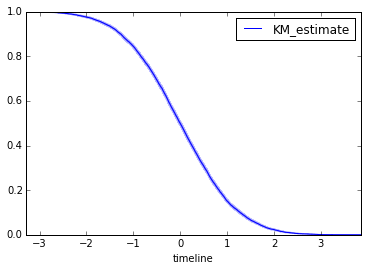

In [15]:
x = np.random.randn(10000)
kmf = KaplanMeierFitter()
kmf.fit(x)
kmf.plot()

The monte carlo resample can also provide these statistics

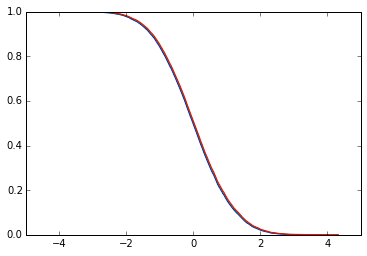

In [16]:
# Number of times we bootstrap
k = 10000

# The original dataset
x = np.random.randn(10000)

# We sample each distribution at the same percentiles defined here.  The 
# resolution (here, 500) describes how well we sample that line.
prange = np.linspace(0,100,500)

# Prepare the output data structure
results = np.zeros((k,len(prange)))

# Sample randomly, and record results
for i in range(k):
    s = np.random.choice(x,size=len(x),replace=True)
    results[i,:] = np.percentile(s,prange)

# Calculate estimates    
bounds_5 = np.percentile(results,5,axis=0)
bounds_50 = np.percentile(results,50,axis=0)
bounds_95 = np.percentile(results,95,axis=0)

# Plot results
plt.plot(bounds_5,(100-prange)/100)
plt.plot(bounds_50,(100-prange)/100)
plt.plot(bounds_95,(100-prange)/100)